In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal
import random
import functools
import cmath
import math as ma


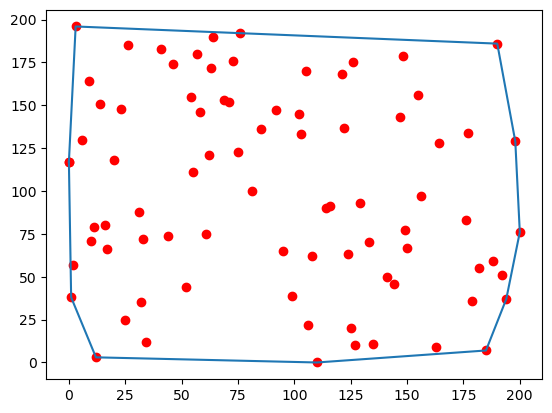

In [2]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal
import random
import functools
import cmath
import math as ma

def print_x_y(lis,hull):
    mx=[]
    my=[]
    lx=[]
    ly=[]
    for (x,y) in hull:
        mx.append(x)
        my.append(y)

    for (x,y) in lis:
        if (x,y)  not in hull:
            lx.append(x)
            ly.append(y)

    (x1,y1)=hull[0]
    mx.append(x1)
    my.append(y1)
    plt.plot(mx,my)
    plt.scatter(lx,ly,color='red')
    plt.scatter(mx,my,color='red')
    plt.show()
    # a="photo"
    # a+= str(i)
    # a+=".png"
    # plt.savefig(a)
    # plt.close()

def convex_hull_graham(spots):
   

    def turn(p1,p2,p3):
        q=np.array([(1,p1[0],p1[1]),(1,p2[0],p2[1]),(1,p3[0],p3[1])])
        a=np.linalg.det(q)
        return (round(a) > 0) - (round(a) < 0)

    def keep(spots):
        hull=[]
        for i in range(len(spots)):
            while len(hull)>=2 and turn(hull[-2],hull[-1],spots[i])!=1:
                    # print_x_y(spots,hull)
                    hull.pop()

            hull.append(spots[i])

        return hull
    
    p0= min(spots,key=lambda x:[x[1],x[0]] )
    spots.sort(key=lambda x:(x[0],x[1], ma.dist(p0,x) ) )
    l=keep(spots)
    spots.reverse()
   
    u=keep(spots)
    
    return l.extend(u[i] for i in range(1, len(u) - 1)) or l


def create_spots(many=10,tx=100,ty=100):
    x=[]
    y=[]
    lisx=[]
    lis=[]
    i=0
    count=0
    while i<many:
        x=random.randint(0,tx)
        y=random.randint(0,ty)
        count+=1
        if count==many*50:
            print("give bigger x or smaller points")
            break
        if x not in lisx:
            i+=1
            lis.append((x,y))
            lisx.append(x)   
    return lis

la=[(0, 117), (1, 38), (2, 57), (3, 196), (6, 130), (9, 164), (10, 71), (11, 79), (12, 3), (14, 151), (16, 80), (17, 66), (20, 118), (23, 148), (25, 25), (26, 185), (31, 88), (32, 35), (33, 72), (34, 12), (41, 183), (44, 74), (46, 174), (52, 44), (54, 155), (55, 111), (57, 180), (58, 146), (61, 75), (62, 121), (63, 172), (64, 190), (69, 153), (71, 152), (73, 176), (75, 123), (76, 192), (81, 100), (85, 136), (92, 147), (95, 65), (99, 39), (102, 145), (103, 133), (105, 170), (106, 22), (108, 62), (110, 0), (114, 90), (116, 91), (121, 168), (122, 137), (124, 63), (125, 20), (126, 175), (127, 10), (129, 93), (133, 70), (135, 11), (141, 50), (144, 46), (147, 143), (148, 179), (149, 77), (150, 67), (155, 156), (156, 97), (163, 9), (164, 128), (176, 83), (177, 134), (179, 36), (182, 55), (185, 7), (188, 59), (190, 186), (192, 51), (194, 37), (198, 129), (200, 76)]  #create_spots(80,500,500)
# la=[(6, 2), (2, 1), (0, 1), (4, 9), (2, 9)]
# la=create_spots()
# print(la)
aq=convex_hull_graham(la)

print_x_y(la,aq)







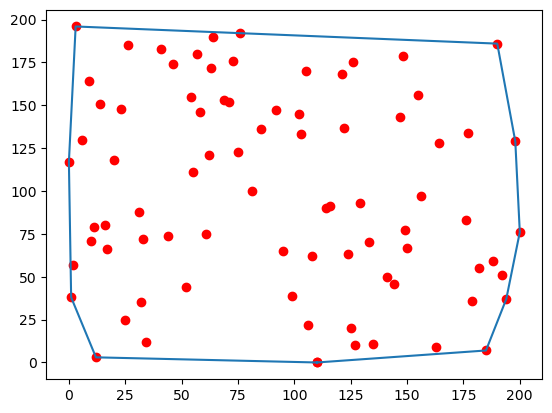

In [6]:
from random import randint #for creating data points
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal
import random
import functools
import cmath
import math as ma

def print_x_y(lis,hull):
    mx=[]
    my=[]
    lx=[]
    ly=[]
    for (x,y) in hull:
        mx.append(x)
        my.append(y)

    for (x,y) in lis:
        if (x,y)  not in hull:
            lx.append(x)
            ly.append(y)

    (x1,y1)=hull[0]
    mx.append(x1)
    my.append(y1)
    plt.plot(mx,my)
    plt.scatter(lx,ly,color='red')
    plt.scatter(mx,my,color='red')
    plt.show()


def create_spots(many=10,tx=100,ty=100):
    x=[]
    y=[]
    lisx=[]
    lis=[]
    i=0
    count=0
    while i<many:
        x=random.randint(0,tx)
        y=random.randint(0,ty)
        count+=1
        if count==many*50:
            print("give bigger x or smaller points")
            break
        if x not in lisx:
            i+=1
            lis.append((x,y))
            lisx.append(x)   
    return lis



def gift_wraping(spots):

    def turn(p1,p2,p3):
        q=np.array([(1,p1[0],p1[1]),(1,p2[0],p2[1]),(1,p3[0],p3[1])])
        a=np.linalg.det(q)
        return (round(a) > 0) - (round(a) < 0)

    def wrap(spots,index,nextIndex,hull,currentVertex,nextVertex):
        while True:
            c0 = currentVertex
            c1 = nextVertex

            checking = points[index]
            c2 = checking

            crossProduct = turn(currentVertex, nextVertex, checking)
            if crossProduct < 0:
                nextVertex = checking
                nextIndex = index
            index += 1
            if index == len(points):
                if nextVertex == spots[0]:
                    break
                index = 0
                hull.append(nextVertex)
                currentVertex = nextVertex
                nextVertex = spots[0]
        return hull 
    
    p0= min(spots,key=lambda x:[x[1],x[0]] )
    spots.sort(key=lambda x:(x[0],x[1]))
    spots.sort(key=lambda x:(x[1],x[0], ma.dist(p0,x)  ) )
    hull = []
    leftMost = points[0]
    currentVertex = leftMost
    hull.append(points[0])
    nextVertex = points[1]
    index = 2
    nextIndex = -1
    return wrap(spots,index,nextIndex,hull,currentVertex,nextVertex)
# end gift_wraping

points=[(0, 117), (1, 38), (2, 57), (3, 196), (6, 130), (9, 164), (10, 71), (11, 79), (12, 3), (14, 151), (16, 80), (17, 66), (20, 118), (23, 148), (25, 25), (26, 185), (31, 88), (32, 35), (33, 72), (34, 12), (41, 183), (44, 74), (46, 174), (52, 44), (54, 155), (55, 111), (57, 180), (58, 146), (61, 75), (62, 121), (63, 172), (64, 190), (69, 153), (71, 152), (73, 176), (75, 123), (76, 192), (81, 100), (85, 136), (92, 147), (95, 65), (99, 39), (102, 145), (103, 133), (105, 170), (106, 22), (108, 62), (110, 0), (114, 90), (116, 91), (121, 168), (122, 137), (124, 63), (125, 20), (126, 175), (127, 10), (129, 93), (133, 70), (135, 11), (141, 50), (144, 46), (147, 143), (148, 179), (149, 77), (150, 67), (155, 156), (156, 97), (163, 9), (164, 128), (176, 83), (177, 134), (179, 36), (182, 55), (185, 7), (188, 59), (190, 186), (192, 51), (194, 37), (198, 129), (200, 76)]   #create_spots(80)
# points=create_spots(10000,100000000,100000000)
hull=gift_wraping(points)

print_x_y(points,hull)


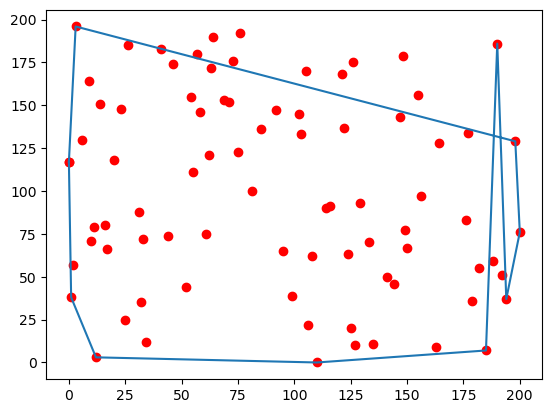

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal
import random
import functools
import cmath
import math as ma

def create_spots(many=10,tx=100,ty=100):
    x=[]
    y=[]
    lisx=[]
    lisy=[]
    lis=[]
    i=0
    count=0
    while i<many:
        x=random.randint(0,tx)
        y=random.randint(0,ty)
        count+=1
        if count==many*50:
            print("give bigger x or smaller points")
            break   
        if x not in lisx and y not in lisy:
            i+=1
            lis.append((x,y))
            lisy.append(y)  
            lisx.append(x)   
    return lis



def checksame(a,b,c):
     return ((b[0] - a[0])*(c[1] - a[1]) - (b[1] - a[1])*(c[0] - a[0])) == 0
def checkdown(a,b,c):
     return ((b[0] - a[0])*(c[1] - a[1]) - (b[1] - a[1])*(c[0] - a[0])) > 0
def checkup(a,b,c):
     return ((b[0] - a[0])*(c[1] - a[1]) - (b[1] - a[1])*(c[0] - a[0])) < 0


def divided_hull(points):

    def turn(p1,p2,p3):
        q=np.array([(1,p1[0],p1[1]),(1,p2[0],p2[1]),(1,p3[0],p3[1])])
        a=np.linalg.det(q)
        return (round(a) > 0) - (round(a) < 0)
    


    if len(points) < 6 and len(points)>2:
        convert=convex_hull_graham(points)
        return convert

    def check(left,right):
        A1=max(left, key=lambda  x:(x[1],x[0] , x[0],x[1]  ))
        B1=max(right, key=lambda  x:(x[1],x[0] , x[0],x[1]  ))
        A2=min(left, key=lambda  x:(x[1],x[0] , x[0],x[1]  ))
        B2=min(right, key=lambda  x:(x[1],x[0] , x[0],x[1]  ))
        # print_x_y(spots,left)
        # print_x_y(spots,right)
        # print_x_y(left+right,[A1,A2,B2,B1])
        newleft=left.copy()
        for a in left:
            if a not in [A1,A2,B2,B1] and (checkdown(A1,A2,a) and checkdown(A2,B2,a) and checkdown(B2,B1,a) and checkup(B2,A2,a))==True:
            #    print(a)
               newleft.remove(a)

        newright=right.copy()
        for a in right:
            if a not in [A1,A2,B2,B1] and (checkdown(A1,A2,a) and checkdown(A2,B2,a) and checkdown(B2,B1,a) and checkup(B2,A2,a))==True:
            #    print(a)
               newright.remove(a)
            
        # print((11, 68))
        ind=newleft.index(A2)
        left1=newleft[0:ind+1]
        left2=newleft[ind+1:]
        # print_x_y(spots,left1+newright+left2)
        return (left1+newright+left2)
        

    left_half = divided_hull(points[0: round(len(points)/2)])
    right_half = divided_hull(points[round(len(points)/2):])
    return check(left_half,right_half)


spots=[(0, 117), (1, 38), (2, 57), (3, 196), (6, 130), (9, 164), (10, 71), (11, 79), (12, 3), (14, 151), (16, 80), (17, 66), (20, 118), (23, 148), (25, 25), (26, 185), (31, 88), (32, 35), (33, 72), (34, 12), (41, 183), (44, 74), (46, 174), (52, 44), (54, 155), (55, 111), (57, 180), (58, 146), (61, 75), (62, 121), (63, 172), (64, 190), (69, 153), (71, 152), (73, 176), (75, 123), (76, 192), (81, 100), (85, 136), (92, 147), (95, 65), (99, 39), (102, 145), (103, 133), (105, 170), (106, 22), (108, 62), (110, 0), (114, 90), (116, 91), (121, 168), (122, 137), (124, 63), (125, 20), (126, 175), (127, 10), (129, 93), (133, 70), (135, 11), (141, 50), (144, 46), (147, 143), (148, 179), (149, 77), (150, 67), (155, 156), (156, 97), (163, 9), (164, 128), (176, 83), (177, 134), (179, 36), (182, 55), (185, 7), (188, 59), (190, 186), (192, 51), (194, 37), (198, 129), (200, 76)]#create_spots()#[(11, 48), (14, 29), (30, 69), (48, 0), (51, 14), (54, 76), (71, 50), (85, 73), (90, 1), (93, 44)] ,[(2, 10), (4, 9), (17, 99), (26, 68), (35, 93), (49, 86), (65, 23), (92, 85), (95, 6), (97, 74)]
# spots= create_spots(10000,100000000,100000000)
p0= min(spots,key=lambda x:[x[1],x[0]] )
spots.sort(key=lambda x:(x[1],x[0], ma.dist(p0,x)  ) )
spots.sort(key=lambda x:(x[0],x[1]))
# print(spots)

hello=divided_hull(spots)
# print(hello)
print_x_y(spots,hello)



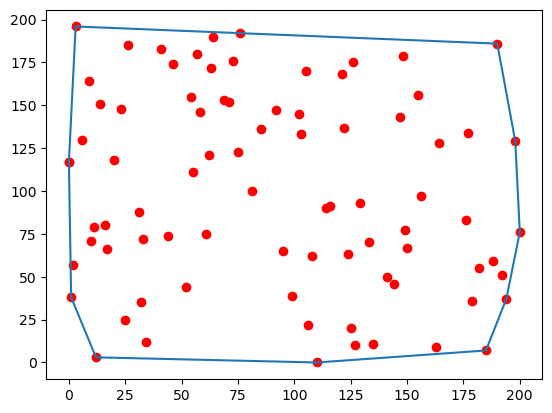

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal
import random
import functools
import cmath
import math as ma

def create_spots(many=10,tx=100,ty=100):
    x=[]
    y=[]
    lisx=[]
    lisy=[]
    lis=[]
    i=0
    count=0
    while i<many:
        x=random.randint(0,tx)
        y=random.randint(0,ty)
        count+=1
        if count==many*50:
            print("give bigger x or smaller points")
            break   
        if x not in lisx and y not in lisy:
            i+=1
            lis.append((x,y))
            lisy.append(y)  
            lisx.append(x)   
    return lis


def print_x_y(lis,hull):
    mx=[]
    my=[]
    lx=[]
    ly=[]
    for (x,y) in hull:
        mx.append(x)
        my.append(y)

    for (x,y) in lis:
        if (x,y)  not in hull:
            lx.append(x)
            ly.append(y)

    (x1,y1)=hull[0]
    mx.append(x1)
    my.append(y1)
    plt.plot(mx,my)
    plt.scatter(lx,ly,color='red')
    plt.scatter(mx,my,color='red')
    plt.show()

def cmp(a, b):
    return (a > b) - (a < b) 


def is_between(a,b, c):
    if ((b[0] - a[0]) * (c[1] - a[1]) == (c[0] - a[0]) * (b[1] - a[1]) and 
        abs(cmp(a[0], c[0]) + cmp(b[0], c[0])) <= 1 and
        abs(cmp(a[1], c[1]) + cmp(b[1], c[1])) <= 1)==True:
        return ["line",abs((b[0] - a[0]) * (c[1] - a[1]) - (c[0] - a[0]) * (b[1] - a[1]))]

    return ["E",abs((b[0] - a[0]) * (c[1] - a[1]) - (c[0] - a[0]) * (b[1] - a[1]))]
   
def turn(p1,p2,p3):
        q=np.array([(1,p1[0],p1[1]),(1,p2[0],p2[1]),(1,p3[0],p3[1])])
        a=np.linalg.det(q)
        return (round(a) > 0) - (round(a) < 0)
   

def quick_hull(spots,X1,X2):
    if(X2 in spots and X2 in spots and len(spots)==2):
        return spots 
    

    checkline=[X1,X2]   
    checknumberline=[]
    for a in spots:
        # print(a,X1,X2)
        if a not in checkline and is_between(X1,X2,a)[0]!="line":
            checkline.append(a)
            checknumberline.append([a,is_between(X1,X2,a)[1]])

    # print_x_y(spots,[X1,X2])
    GOR=max(checknumberline,key=lambda x:[x[1],x[0]] )
    G=GOR[0]
    checkup=[X1,G]   
    for a in spots:

        if a not in checkup and turn(X1,G,a)==True:
            # print("up",X1,G,a)
            checkup.append(a)

    # print_x_y(checkup,[X1,G])



    checkdown=[X2,G]   
    
    for a in spots:
        if a not in checkdown and turn(G,X2,a)==True:
            # print("down",a,G,X2)
            checkdown.append(a)

    # print_x_y(checkdown,[G,X2])


    return  list(dict.fromkeys(quick_hull(checkup,X1,G)+quick_hull(checkdown,G,X2)))





spots=[(0, 117), (1, 38), (2, 57), (3, 196), (6, 130), (9, 164), (10, 71), (11, 79), (12, 3), (14, 151), (16, 80), (17, 66), (20, 118), (23, 148), (25, 25), (26, 185), (31, 88), (32, 35), (33, 72), (34, 12), (41, 183), (44, 74), (46, 174), (52, 44), (54, 155), (55, 111), (57, 180), (58, 146), (61, 75), (62, 121), (63, 172), (64, 190), (69, 153), (71, 152), (73, 176), (75, 123), (76, 192), (81, 100), (85, 136), (92, 147), (95, 65), (99, 39), (102, 145), (103, 133), (105, 170), (106, 22), (108, 62), (110, 0), (114, 90), (116, 91), (121, 168), (122, 137), (124, 63), (125, 20), (126, 175), (127, 10), (129, 93), (133, 70), (135, 11), (141, 50), (144, 46), (147, 143), (148, 179), (149, 77), (150, 67), (155, 156), (156, 97), (163, 9), (164, 128), (176, 83), (177, 134), (179, 36), (182, 55), (185, 7), (188, 59), (190, 186), (192, 51), (194, 37), (198, 129), (200, 76)]   #create_spots(80,200,200)
# spots=create_spots(10000,100000000,100000000)
p0= min(spots,key=lambda x:[x[1],x[0]] )
spots.sort(key=lambda x:(x[1],x[0], ma.dist(p0,x)  ) )
spots.sort(key=lambda x:(x[0],x[1]))
# print(spots)
Y2=max(spots, key=lambda  x:(x[1],x[0]))
X2=max(spots, key=lambda  x:(x[0],x[1]))
Y1=min(spots, key=lambda  x:(x[1],x[0]))
X1=min(spots, key=lambda  x:(x[0],x[1]))

# for a in spots:
#     print(checkup(X1,Y2,a))
#     print_x_y([X1,a,X2],[X2,X1])


hello1=quick_hull(spots,X1,Y1)
hello2=quick_hull(spots,X1,Y2)
hello3=quick_hull(spots,Y1,X2)
hello4=quick_hull(spots,Y2,X2)


hello=list(dict.fromkeys(hello1+hello3+hello4+hello2))

print_x_y(spots,hello)

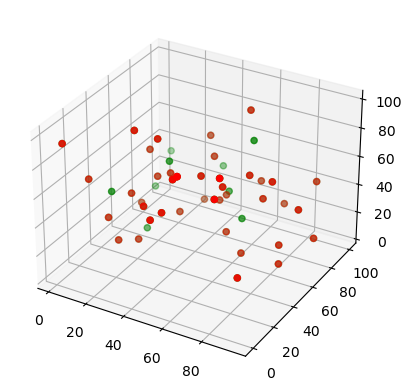

In [10]:

 
# # syntax for 3-D projection
# ax = plt.axes(projection ='3d')
 
# # defining all 3 axis
# z = np.linspace(0, 1, 100)
# x = z * np.sin(25 * z)
# y = z * np.cos(25 * z)
 
# # plotting
# ax.plot3D(x, y, z, 'green')
# ax.set_title('3D line plot geeks for geeks')
# plt.show()
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal
import random
import functools
import cmath
import math as ma


def print_x_y_z(lis,hull):
    mx=[]
    my=[]
    mz=[]
    lx=[]
    ly=[]
    lz=[]
    for (x,y,z) in hull:
        mx.append(x)
        my.append(y)
        mz.append(z)

    for (x,y,z) in lis:
        if (x,y)  not in hull:
            lx.append(x)
            ly.append(y)
            lz.append(z)

    (x1,y1,z1)=hull[0]
    mx.append(x1)
    my.append(y1)
    mz.append(z1)
    ax = plt.axes(projection ='3d')
    # ax.plot3D(mx,my,mz, '')
    ax.scatter(lx,ly,lz,color='green')
    ax.scatter(mx,my,mz,color='red')
    plt.show()

# def checksame(a,b,c):
#      return ((b[0] - a[0])*(c[1] - a[1]) - (b[1] - a[1])*(c[0] - a[0])) == 0


def convex_hull_graham3d(spots):
   

    def turn(p1,p2,p3,p4):
        
        q=np.array([(1,p1[0],p1[1],p1[2]),(1,p2[0],p2[1],p2[2]),(1,p3[0],p3[1],p3[2]),(1,p4[0],p4[1],p4[2])])
        a=np.linalg.det(q)
        return (round(a) > 0) - (round(a) < 0)

    def keep(spots):
        hull=[]
        
        for i in range(len(spots)):
            # if len(hull)>=3:
                # print(hull[-3],hull[-2],hull[-1],spots[i])
            while len(hull)>=3 and turn(hull[-3],hull[-2],hull[-1],spots[i])!=1:
                  hull.pop()
            hull.append(spots[i])

        return hull
    
    p0= min(spots,key=lambda x:[x[0],x[1],x[2]] )
    p1= min(spots,key=lambda x:[x[2],x[1],x[0]] )
    spots.sort(key=lambda x:(x[1],x[2],x[0], ma.dist(p0,x),ma.dist(p1,x) ) )
    l=keep(spots)
    # print(spots)
    spots.reverse()
    # print(spots)
   
    u=keep(spots)
    
    return list(dict.fromkeys(l.extend(u[i] for i in range(1, len(u) - 1)) or l))
   



def create_spots3d(many=10,tx=100,ty=100,tz=100):
    lisx=[]
    lis=[]
    i=0
    count=0
    while i<many:
        x=random.randint(0,tx)
        y=random.randint(0,ty)
        z=random.randint(0,tz)
        count+=1
        if count==many*50:
            print("give bigger x or smaller points")
            break
        if x not in lisx:
            i+=1
            lis.append((x,y,z))
            lisx.append(x)   
    return lis

la=create_spots3d(50,100,100)
aq=convex_hull_graham3d(la)


# print(aq)
print_x_y_z(la,aq)
